In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd

def prediction(parameters,x):
    return np.transpose(np.dot(parameters,np.transpose(x)))

def gradient_descent(learning_rate,parameters, y, x):
    return (learning_rate/x.shape[0])*np.sum((y-prediction(parameters,x))*x,axis=0)

def loss_function(parameters, y, x):
    return (1/(2*x.shape[0]))*np.sum(np.square(y-prediction(parameters,x)))

In [2]:
parameters = np.array([3,1,2]).reshape((1,3))
x1 = np.random.normal(loc = 3, scale = 2, size = (1000000,))
x2 = np.random.normal(loc = -1, scale = 2, size = (1000000,))

In [3]:
x = np.ones((x1.shape[0],3))
x[:,1] = x1
x[:,2] = x2

In [4]:
y = prediction(parameters,x) 

y = y + np.random.normal(loc = 0, scale = np.sqrt(2), size = (1000000,1))

In [5]:
parameters = np.array([0,0,0]).reshape((1,3))
learning_rate = 0.001
batch_size = 1
num_batches = int(x.shape[0]/batch_size)
x_batches = np.ones((num_batches,batch_size,x.shape[1]))
y_batches = np.ones((num_batches,batch_size,y.shape[1]))

for b in range(num_batches):
    x_batches[b] = x[[(b*batch_size + j) for j in range(batch_size)]]
    y_batches[b] = y[[(b*batch_size + j) for j in range(batch_size)]]

In [6]:
batch_round_robin = 0
min_change = 0.001
learning_history = []

current_loss = loss_function(parameters,y_batches[batch_round_robin],x_batches[batch_round_robin])
prev_loss = float('inf')
change = 0
iter = 0
max_iter = 10000
while iter<max_iter:#(prev_loss-current_loss)> min_change:
    change = gradient_descent(learning_rate,parameters,y_batches[batch_round_robin],x_batches[batch_round_robin])
    print(prev_loss)
    learning_history.append(parameters)
    prev_loss = loss_function(parameters,y_batches[batch_round_robin],x_batches[batch_round_robin])

    parameters = parameters+change
    current_loss = loss_function(parameters,y_batches[batch_round_robin],x_batches[batch_round_robin])
    batch_round_robin = (batch_round_robin + 1) % num_batches
    iter = iter+1

print(parameters)

inf
72.45639878218617
0.0034044596518241496
0.8495688201723861
22.115433293103248
44.41055434974464
6.118535623700901
16.79774916128501
22.858883715242637
5.532228561208678
0.2162828886198498
0.10403720875832073
35.5058354885644
0.0956729092073242
5.28920736897015
13.219142095415062
25.396381770452365
0.39411845034878634
0.19759833819413594
2.3334964937351166
11.734062888286937
22.305387169121595
0.006145416250776483
1.3330964884146728
7.4508462036232315
2.062854129661534
22.971259818756284
13.69720607992481
45.45074144152856
57.75529722639807
6.204864618739872
4.323914110704192
0.20336290276474445
10.283349513606687
16.337042083004242
68.85928802091576
1.0116039832071195
15.496034499917874
33.68014464175319
0.006343993429743705
1.1910822521239481
34.27325596922255
1.5323119521592974
14.942591921522581
45.10339688930494
10.509836135724633
30.62825424797574
2.3920282142265976
32.65789182531704
0.4034415671395891
0.30500537399464506
16.188630716601665
7.558893545104528
15.825101995019027

0.6032159248994362
0.29120928092583814
3.5701083910160945
0.5164765422897273
0.0792920750144543
0.30477650383800814
7.3047853819204605
0.026165872621323527
0.05942743253595501
2.1419047775846383
2.6379739549435364
0.03034137572626521
3.8683336398413517
0.1149412060136145
0.2873072604774875
0.1693500424498319
0.3436372273102372
2.0628516988688386
0.05235996019316939
0.4495457777578868
2.1956509273787437
2.071837876478618
0.9655095618533235
0.05577873873456491
0.38345664417715253
3.6695153199845927
0.23175079440714735
0.17768911945214513
2.2409212651063055
0.1254617947737037
0.43178313518723005
0.00010610949734713701
0.43951968017952636
0.7062908481875447
0.5545819067486963
0.027255592747422192
0.2361229125137016
1.545174513884913
4.085953329505586
13.105965331999096
5.673271567070881
2.946633935462853
0.7076985310886527
0.523658599789849
0.07592937950116749
3.149058077444939
2.16986711800124
0.2884313352334878
1.4610328513523376
0.36867387549296743
5.907149035452511
0.35725161074642925


1.2704819501834308
0.200045540461689
2.54403518492441
0.8476244345408706
1.4418951003846623
0.28025153264597225
4.120065883072155
0.04554521790030395
0.012464228501949504
0.014455011793572562
0.7379680436451352
0.1931840788370749
1.0524693577848634
1.6068119564718237
0.01518298181404972
0.12221778533915388
0.9985666275079632
0.646241128674135
1.121285560748731
0.045006076851430626
0.34275031070679307
0.07348588438922801
0.0006630185621208862
1.4550858148225445
0.6216237312174597
1.8894075163599209
0.09251557143106699
1.2324503322792244
0.5913794959172546
0.49656044086192924
0.5492488801460379
8.653351382022398
2.155335426414391
1.3816687531543983
0.35763522173491197
0.5916167964085047
0.3113916995370188
1.570232608778642
0.21694054007663308
0.5688818537914566
0.583129141950297
0.011923845061008288
0.04356424366900667
0.018661435689431724
3.534355767260135
0.4691080141753929
0.006068186651143491
0.6748567166398621
0.10421432347414726
1.4155728168260588
0.04667222909084249
1.357081106923

0.0007240793105692018
1.940524622799342
1.3321718112878578
1.434472941321367
1.0101885835658793
0.0003224049148472343
0.09965613712132278
0.05243905198844906
0.8877718329935039
0.18642728310930767
1.2489877507590765
0.1742062357204795
0.55244648013679
0.6703869375388055
0.01981276799092557
1.610659809798536
0.27621633947291696
0.6591681322289311
0.004641804626995509
0.09514712138171481
1.6054930550880002
0.2739488080409707
0.09307402939352329
0.03494456619924273
0.975584672596493
0.7540525379111631
0.3765077506769809
0.7759550216296712
0.08287310042792938
4.04396469659968
2.8589738370513147
5.737063531696823
0.03777257478536915
0.04092362296038482
1.005786262079652
0.29403531635671243
0.0031011418465689646
2.10196825333996
0.7326085204017452
0.1152905447267575
3.4654257540161035
0.00016648370087429825
0.5744423090250664
0.04260926750052394
0.1558128794785384
1.9069828891350908
0.2484593990688624
0.44894719198285155
0.2944488741057923
0.4920659180798634
0.03803388157415486
7.87371623005

0.17626065461158902
0.6441956929248344
0.7623410791203408
0.2534366851814081
0.7290302746270942
0.3474450496297856
1.412541053517594
0.48782763238385246
0.7297114141763459
0.7278733627324956
0.8143264889842516
6.016318100609239
0.011998387790206351
0.0033094479427214574
0.8438755904210875
0.09811169924297952
1.3833539712834064
0.6967186814806043
0.08556445391464834
0.041194866520194814
0.2770937761095329
0.15995394852175432
3.123630736421276e-05
0.7021656599280027
1.1154991778905026
0.009270076901728215
1.5588825129476447
0.36399454614476884
1.347024635539859
0.10632574634152885
0.8639623566007851
2.9474291854169845
2.9232899363254736
0.22651476168156143
0.17957885838234744
6.415606034879164
5.15192095745861
0.06866291267847133
0.054707913558146214
0.5185990807119076
1.5071161334616283
0.7789110168385367
0.0007721293869337067
0.5987463638865173
0.74377106474446
0.20451247195860328
1.2424545936123397
1.7405951137177706
0.007111317086365394
0.14282661204982058
0.009781862223658658
0.2249

0.7490856705730228
2.425756027188107
0.07523743014271493
0.37207633539002277
0.20440450055406387
2.2502500212028793
1.9135655645369087
0.5436732752160526
0.23437996731423721
0.9099102200224948
0.7502760301374467
3.2669871131535713
1.0283275637497955
1.7185193682464472
12.201263758702321
0.03930591893034496
0.8249151802300279
0.18662798207288891
0.00032113168648631473
1.9892085994314712
0.8223650504620788
0.11914748291388456
0.33513680994052136
0.15101152767840118
0.06115355499168715
0.012455942063001305
0.7061024570967191
1.6320453873446763
1.8417448265401948
2.735070281492365
3.373908013865001
0.1382803602270815
3.0027910699214497
0.020860512102856197
0.0018862856908034732
0.3350343323978124
0.3212569322322431
0.015000063855402828
1.5975388868117273
1.2878666511631462
0.047283227356999094
0.09274324791024212
0.362358248228147
0.19580552166557708
3.8668815575101867
2.3976850735069544
0.5221332438187953
0.8164802315980165
4.772301552520376
0.09576392006528184
0.004009367095607859
0.1752

0.012083475990803717
0.018542832162640133
0.0947509431364415
2.982307564916639
0.005504731870821225
0.056398548008817155
1.5085623477901795
0.813913123222437
0.033043125235167656
0.3551346361964613
2.437980924162129
1.4505560181903583
0.046677573476800016
0.02322552606141537
1.2476049774609512
0.13230180423673155
9.031623519804423
0.3103711259760875
6.977691428567163
0.06685759951105162
1.8344329087498856
3.2338027275587136
0.7278521887537306
0.0207485022090113
0.20284602317787268
1.2722674543007044
0.026601342441830635
1.9263504688694628
1.6879515552905686
0.10341896792824151
0.7399600951015474
0.25991494545135807
0.6378470560004559
6.119566085709092
0.04885252853896327
0.6224709938903376
1.0274848850274128
0.08753411233644608
0.053740664404504236
0.4900903399460597
2.982548164508587
3.362071501427425
0.2177928645285127
0.14036582637643752
1.447616805187417
0.035117081605650316
0.410725554095954
0.048242603683887726
0.2586389649567842
3.492558678437341
0.7862993383109368
1.33458232377

0.2366033865277761
0.005837265031418344
0.003472876245171775
0.0009940580554163867
0.7151123403206039
1.2187446820089776
0.0046684111679840086
0.04890739269862657
0.005642573919777781
1.984579268060222
0.18187094262191975
1.5287318226686974
0.2662781514701518
1.0980368805264114
0.0046184084969380715
2.68368434927111
2.282376917370427
0.6221513632205931
2.222323394956308
0.14995375808124572
0.2751563723949734
0.06135447082140237
0.9661837417667146
0.06229260745738264
0.47381415983150965
0.0022958369446254207
0.873098231842369
2.690885035301417
1.303393989080824
1.4344142469372094
0.194158960638518
0.017949020028270972
0.02084355965124789
1.6015548535124862
2.233544028539731
0.7273880851920772
3.165408867996746
0.04264256443602304
1.4110495102289786
0.23794924736633316
2.362421837894317
0.04791120323963248
0.024752919442556573
0.2505117946320802
0.8214210691161866
4.365317599172464
4.457579560330287
1.0010688207427922
4.253099001734349
2.3655878853140235
2.0089406619116787
0.554786053398

In [7]:
linearX = pd.read_csv("q2test.csv")
data = linearX.to_numpy()
x = np.ones((data.shape[0],3))
x[:,1] = data[:,0]
x[:,2] = data[:,1]
y = data[:,2].reshape((data.shape[0],1))
print(x,y)

[[  1.     16.678  13.018]
 [  1.      6.583  -5.539]
 [  1.    -19.837   6.089]
 ...
 [  1.      6.381   2.484]
 [  1.      3.138  -5.425]
 [  1.      5.502  -8.332]] [[45.537]
 [-1.17 ]
 [-3.646]
 ...
 [13.018]
 [-6.873]
 [-7.749]]


In [8]:
print(loss_function(parameters,y,x))

1.225308978534558


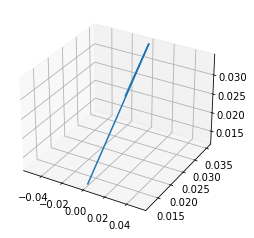

In [14]:
learning_history = np.squeeze(np.array(learning_history))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.plot(learning_history[:][0].T,learning_history[:][1].T,learning_history[:][2].T)

In [20]:
print(learning_history[:,0])

[0.         0.01203797 0.01195546 ... 2.83170695 2.83339091 2.83231464]
